# Phân cụm chữ số viết tay

## Bộ dữ liệu MNIST

Là bộ dữ liệu lớn về chữ số viết tay và được sử dụng trong hầu hết thuật toán phân loại. MNIST bao gồm hai tập con:<br>
- Tập huấn luyện có 60 nghìn mẫu
- Tập kiểm tra có 10 nghìn mẫu.
- Tất cả đều được gán nhãn.

Mỗi bức ảnh là một ảnh xám, kích thước 28 x 28 điểm ảnh (784 điểm ảnh). Mỗi điểm ảnh mang một giá trị số tự nhiên từ 0 đến 255. Các điểm ảnh đen có giá trị bằng không, điểm ảnh càng sáng giá trị càng cao.

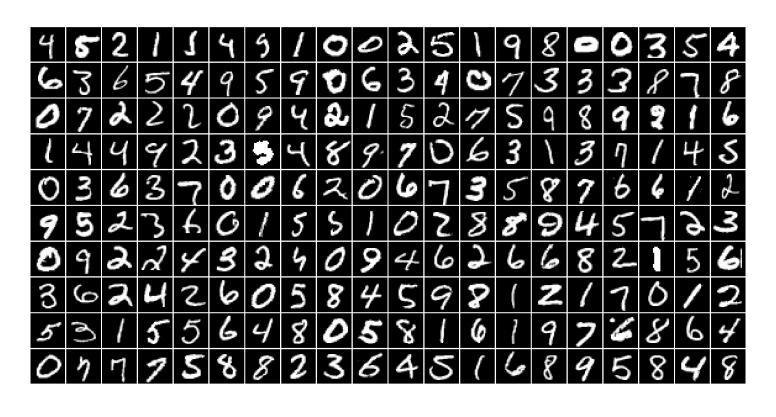

200 mẫu ngẫu nhiên của bộ dữ liệu

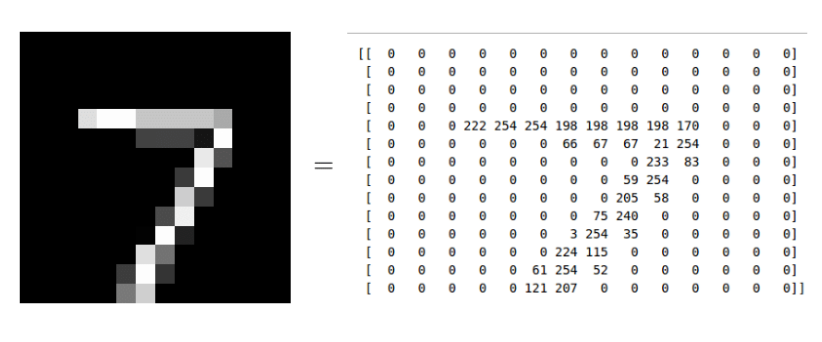

Ví dụ: `số 7` biểu diễn ma trận giá trị các điểm ảnh

## Bài toán:

Giả sử ta không biết nhãn của các bức ảnh này, hãy phân các bức ảnh giống nhau về một cụm.<br><br>
Bài toán này có thể được giải quyết bằng K-means. Mỗi bức ảnh có thể được coi là điểm dữ liệu với vector đặc trưng là vector cột với 784 chiều.<br>
Vector nãy được nhận dạng bằng cách chồng các cột của ma trận ảnh lên nhau

### Download data and import librabries

In [30]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = "mnist_784")
mnist_data = mnist['data']
print(mnist_data.shape)

c:\Users\Thang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


Trong sklearn mỗi điểm dữ liệu được lưu dưới dạng vector hàng. Tiếp theo, ta lấy ra ngãu nhiên 10000 mẫu và thực hiện phân cụm K-means trên tập con này

In [36]:
import random
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from display_network import *

random.seed(18)
K = 10 # number of clusters
N = 10000 # number of samples

X = mnist_data
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


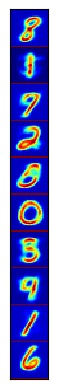

In [37]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))


Chọn một vài ảnh từ mỗi cluster

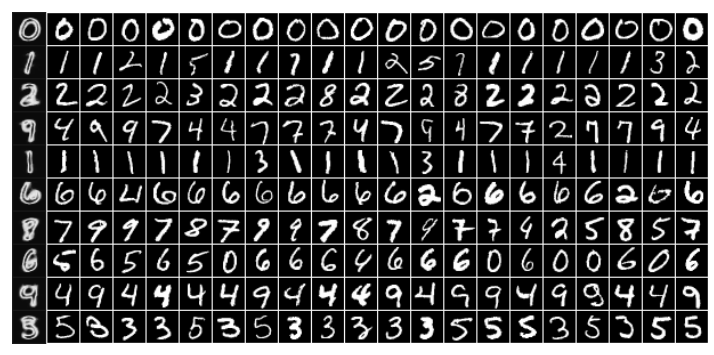

Tâm cụm (ở đầu) và các mẫu ngẫu nhiên

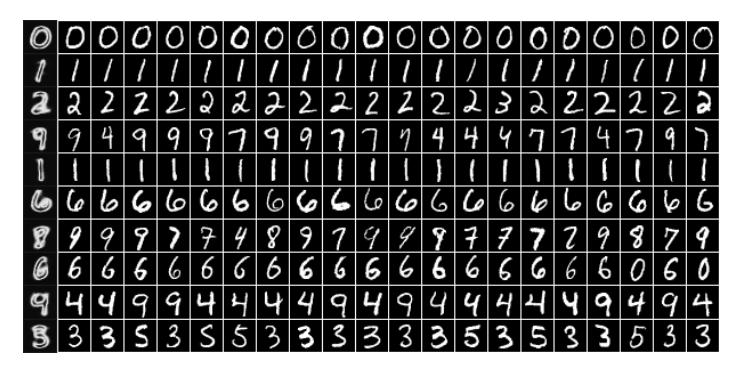

Các điểm gần tâm cụm nhất

## Nhận xét:

- Số 1 có hai kiểu: thẳng và chéo. Phân cụm K-means nghĩ nó là 2 số khác nhau nên phân làm 2 loại. Nếu có sự can thiệp của con người thì sẽ gộp chung lại được
- Ở hàng thứ 9, chữ số 4 và 9 được phân vào 1 cụm. Điều này dễ hiểu vì hai số này khá giống nhau. Tương tự vơi 7, 8, 9. Phân cụm K-means có thể được áp dụng để tiếp tục phân nhỏ các cụm đó.

Một kỹ thuật phân cụm thường được sử dụng là *phân cụm theo tầng (hierarchical
clustering)*. Có 2 loại:

- *Agglomerative* (đi từ dưới lên): Ban đầu ta chọn K là số lớn nhất gần bằng số điểm dữ liệu. Sau khi thực hiện phân cụm **K-means** lần đầu, các cụm gần nhau được ghép lại thành một cụm. Khoảng cách giữa các cụm có thể được xác định bằng khoảng cách giữa các tâm cụm. Sau bước này ta thu được số lượng cụm nhỏ hơn. Tiếp tục thực hiện **K-means** với điểm khởi tạo là tâm của cụm lớn vừa thu được. Lặp lại cho đến khi thu được kết quả chấp nhận được

- *Divisive* (đi từ trên xuống): Ban đầu, thưc hiện **K-means** với K nhỏ để thu được cụm lớn. Sau đó tiếp tục áp dụng phân cụm **K-means** vào mỗi cụm đến lớn khi kết quả chấp nhận được